In [1]:
#importamos todas las librerias que vamos a utilizar para el manejo de los datos y visualizaciones
import pandas as pd
from summarytools import dfSummary
import seaborn as sns
from sklearn.preprocessing import power_transform
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
import plotly.express as px

In [2]:
#leemos el dataset, lo asignamos a nuestra variable data
data = pd.read_csv('BankChurners.csv')

In [3]:
#vemos las medidas estadisticas generales 
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [4]:
#obtenemos un resumen del comportamiento de las columnas que constituyen el dataset
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CLIENTNUM[int64],Mean (sd) : 739177606.3 (36903783.5)min < med < max:708082083.0 < 717926358.0 < 828343083.0IQR (CV) : 60106762.5 (20.0),"10,127 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3YsW7aUBSA4XMhQdcQ7hUhJVuWbonUASkLD9AxD5tH6MDQtRm6MGWJUBAyjYOFZdyhTdWqCuBrEDnk/2aObVm/uAdMURQCvHW1fT8AsImjdR8wxkQi0gi8/qIoinngLPDHylCNMVG3271xznVCLj6bzabGmFtiRVXrvlEbzrnOYDCYe+/TMheO49gOh8POZDJpiAihopK1R7+IiPc+7fV6zwHXjwJmgP/wYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQ4WjfD3CIjDGRiDQCxxdFUcy3+TyHgFC3zBgTdbvdG+dcJ2R+NptNjTG3xPovQt2+hnOuMxgM5t77tMxgHMd2OBx2JpNJQ0QI9S87DTXP82MRccaY0EuoPQa992mv13suO5fnuZN3+s5W2VmoSZIcZ1n26eLiol6v10t9s7x4b8cg7+x1Owt1sVgcWWub/X4/PT8/n5adf4/HIO/sdTvfUVutVtAR+Fu01YdRYl/vrOK/FSK//u5cBs6uXFn4MXVgKvwusKenp5+9963Q+yZJ8vHk5GRUq9WysvPrVhZCPSBVdtwsy6yIXF1fX389Ozublb33/f195+7u7kO/3/9edm3ZZGUh1FdUOAbdcrk83vbzbKLKjvs7tKa1NgtZO6bTaSRSaW1ZubK86VAr/r1VZV8KPgazLLN5nl+lafpFREL3zEpCYnkJ7a3aKNQ4jm3ZCz89PVkRkSRJ7Hg8bpadf3h4aIceY1X3pZdj8PLy8lu73f5RZvbx8dGORqNmHMet8Xi8KDNb9Z1Vmd/nvTfp6yeJ80MUZUbkNQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Attrition_Flag[object],1. Existing Customer2. Attrited Customer,"8,500 (83.9%)1,627 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Gender[object],1. F2. M,"5,358 (52.9%)4,769 (47.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa5CETJRBx8GCiie7vWcFH3MxJPi5UooBCs7MrmZ26X3IH/Aspdx7H3FkfhzHrxDC0PuQs8s5r865b4J7z4cQhnme7zHGR+9jzmrbts+U0rAsy8XMiO0Nb2YWY3xM03TrfczJXXsfcHQfvQ/A/0FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOMN/v5+K/3IWfG86vjc85rSmkwPv77lZzzambP3nccGYOXdh

<Axes: xlabel='Customer_Age', ylabel='Count'>

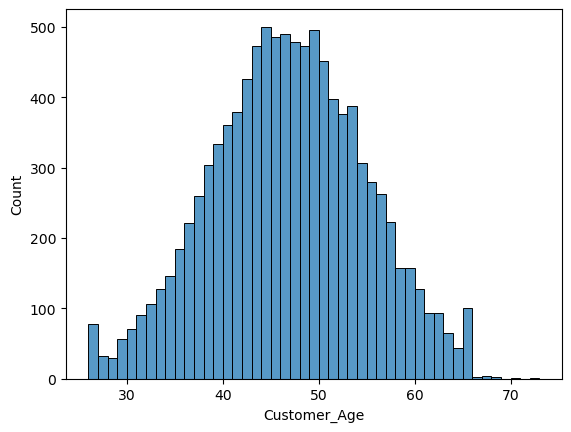

In [5]:
#creamos un histograma para ver el comportamiento de los datos de Customer Age
sns.histplot(data = data, x='Customer_Age')

<Axes: xlabel='Credit_Limit', ylabel='Count'>

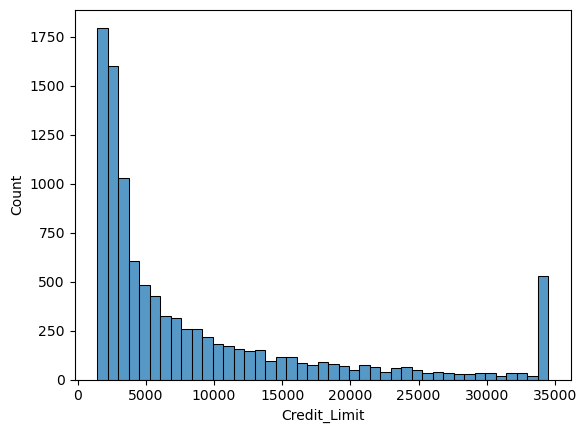

In [30]:
#creamos un histograma para ver el comportamiento de los datos de Dependent_count
sns.histplot(data=data, x='Credit_Limit')

<Axes: xlabel='Total_Trans_Amt', ylabel='Count'>

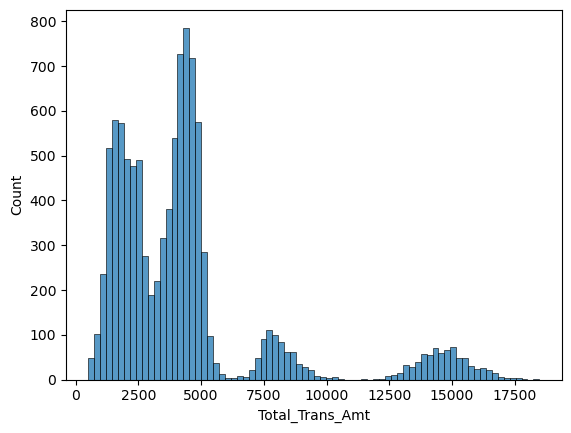

In [7]:
#creamos un histograma para ver el comportamiento de los datos de Marital_Status
sns.histplot(data=data, x='Total_Trans_Amt')

In [31]:
#extraemos solamente las columnas que nos interesan, las asignamos a una nueva variable
data_clean = data[['Total_Trans_Amt', 'Credit_Limit', 'Customer_Age']]
data_clean

,Total_Trans_Amt,Credit_Limit,Customer_Age
0,1144,12691.0,45
1,1291,8256.0,49
2,1887,3418.0,51
3,1171,3313.0,40
4,816,4716.0,40
...,...,...,...
10122,15476,4003.0,50
10123,8764,4277.0,41
10124,10291,5409.0,44
10125,8395,5281.0,30


<Axes: >

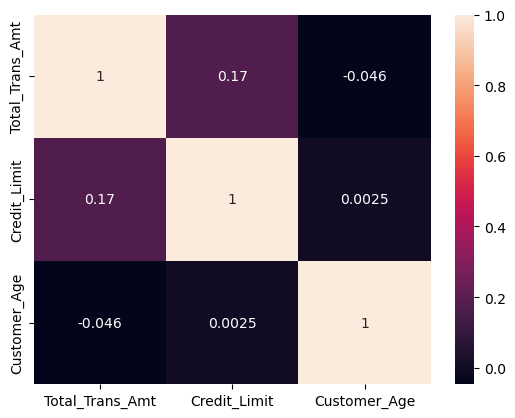

In [32]:
#graficamos una matriz de correlacion, los valores son suficientemente bajos 
sns.heatmap(data_clean[['Total_Trans_Amt','Credit_Limit','Customer_Age']].corr(),annot=True)

Método IQR

In [33]:
#metodo de rangos inter cuartiles
#iqr

#ciclo para aplicar el iqr a las columnas del nuevo sub data set data_clean y eliminar los outliers 
#se agregan 3 nuevas columnas para ver los outliers

for col in data_clean.columns:
    column = data_clean[col]

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    IQR = Q3 - Q1

    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR

    data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)

    print(f'{col =} {Q1 =} {Q3=} {IQR =} {umbral_inferior = } {umbral_superior = }')

col ='Total_Trans_Amt' Q1 =2155.5 Q3=4741.0 IQR =2585.5 umbral_inferior = -1722.75 umbral_superior = 8619.25
col ='Credit_Limit' Q1 =2555.0 Q3=11067.5 IQR =8512.5 umbral_inferior = -10213.75 umbral_superior = 23836.25
col ='Customer_Age' Q1 =41.0 Q3=52.0 IQR =11.0 umbral_inferior = 24.5 umbral_superior = 68.5


C:\Users\Pc\AppData\Local\Temp\ipykernel_18536\3031597131.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)
C:\Users\Pc\AppData\Local\Temp\ipykernel_18536\3031597131.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)
C:\Users\Pc\AppData\Local\Temp\ipykernel_18536\3031597131.py:18: SettingWithCopyWarning: 
A value is trying to be 

In [34]:
data_clean

,Total_Trans_Amt,Credit_Limit,Customer_Age,Total_Trans_Amt_outliers,Credit_Limit_outliers,Customer_Age_outliers
0,1144,12691.0,45,False,False,False
1,1291,8256.0,49,False,False,False
2,1887,3418.0,51,False,False,False
3,1171,3313.0,40,False,False,False
4,816,4716.0,40,False,False,False
...,...,...,...,...,...,...
10122,15476,4003.0,50,True,False,False
10123,8764,4277.0,41,True,False,False
10124,10291,5409.0,44,True,False,False
10125,8395,5281.0,30,False,False,False


In [35]:
#verificamos la cantidad de outliers por columna
data_clean.groupby(by='Total_Trans_Amt_outliers').count()

,Total_Trans_Amt,Credit_Limit,Customer_Age,Credit_Limit_outliers,Customer_Age_outliers
Total_Trans_Amt_outliers,,,,,
False,9231,9231,9231,9231,9231
True,896,896,896,896,896


In [37]:
#verificamos la cantidad de outliers por columna
data_clean.groupby(by='Credit_Limit_outliers').count()

,Total_Trans_Amt,Credit_Limit,Customer_Age,Total_Trans_Amt_outliers,Customer_Age_outliers
Credit_Limit_outliers,,,,,
False,9143,9143,9143,9143,9143
True,984,984,984,984,984


In [38]:
#verificamos la cantidad de outliers por columna
data_clean.groupby(by='Customer_Age_outliers').count()

,Total_Trans_Amt,Credit_Limit,Customer_Age,Total_Trans_Amt_outliers,Credit_Limit_outliers
Customer_Age_outliers,,,,,
False,10125,10125,10125,10125,10125
True,2,2,2,2,2


In [39]:
#quitamos los outliers columna por columna 
#asignamos el resultado a un nuevo dataset data_noout
data_noout =  data_clean[data_clean['Total_Trans_Amt_outliers'] == False]
data_noout = data_noout[data_noout['Credit_Limit_outliers'] == False]
data_noout = data_noout[data_noout['Customer_Age_outliers'] == False]
data_noout.reset_index(drop=True)

,Total_Trans_Amt,Credit_Limit,Customer_Age,Total_Trans_Amt_outliers,Credit_Limit_outliers,Customer_Age_outliers
0,1144,12691.0,45,False,False,False
1,1291,8256.0,49,False,False,False
2,1887,3418.0,51,False,False,False
3,1171,3313.0,40,False,False,False
4,816,4716.0,40,False,False,False
...,...,...,...,...,...,...
8436,7590,4167.0,49,False,False,False
8437,7636,9611.0,52,False,False,False
8438,8531,22754.0,51,False,False,False
8439,6009,14657.0,55,False,False,False


In [40]:
#verificamos que hay menos registros que en el data_clean
data_noout.describe()

,Total_Trans_Amt,Credit_Limit,Customer_Age
count,8441.000000,8441.000000,8441.000000
mean,3473.692927,5918.245480,46.429451
std,1616.268012,5116.261508,8.112846
min,510.000000,1438.300000,26.000000
25%,2066.000000,2358.000000,41.000000
50%,3684.000000,3624.000000,46.000000
75%,4520.000000,7942.000000,52.000000
max,8618.000000,23742.000000,68.000000


<Axes: xlabel='Total_Trans_Amt', ylabel='Count'>

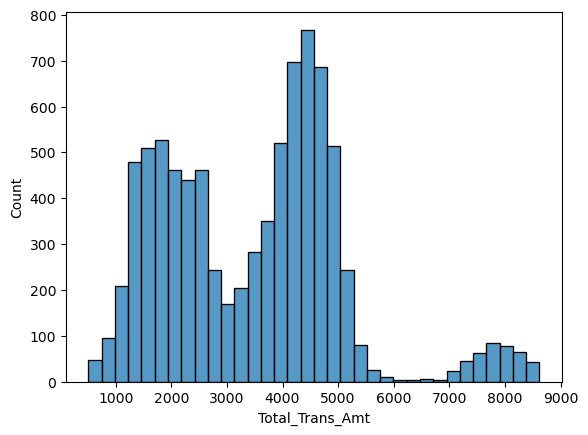

In [41]:
#nuevos histogramas sin los outliers
sns.histplot(data=data_noout, x='Total_Trans_Amt')

<Axes: xlabel='Credit_Limit', ylabel='Count'>

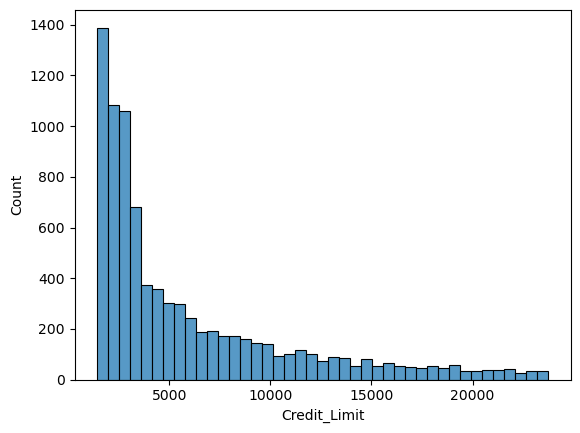

In [42]:
sns.histplot(data=data_noout, x='Credit_Limit')

<Axes: xlabel='Customer_Age', ylabel='Count'>

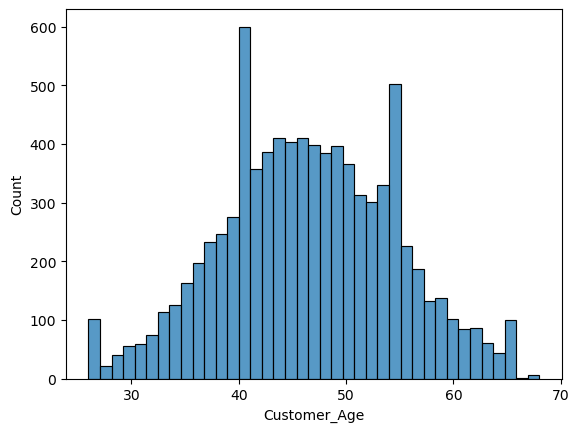

In [43]:
sns.histplot(data=data_noout, x='Customer_Age')

In [44]:
dfSummary(data_noout)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Total_Trans_Amt[int64],Mean (sd) : 3473.7 (1616.3)min < med < max:510.0 < 3684.0 < 8618.0IQR (CV) : 2454.0 (2.1),"3,970 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC20lEQVR4nO3dvW4aQRRA4TvBJgNEu/zFdLQuLKVAouEBUvph8wgpKNLQ8AZ0lgCBTCCsMSliElsiwM7M2nvx+fqJN8qRoxkuO2a73QqQdx/e+gGAU1y89QPklTGmJCJFx+Xr7Xa7DPk87x2h7mGMKTUajdsoimou6+fz+dQY841YwyHU/YpRFNV6vd4yjuNVmoWz2cz2+/3aeDwuigihBkKoB8RxvLq6uvrpsLQU/GHeOTZTUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKFCph+hek4giTCFhCeZheo7gSTCFBL+yfI3qvMEkghTSHgp8+kpjwkkEaaQ8ITNFFQgVKhAqFCBCf8MbDabSxGJjDEuyzmS24NQA1ssFpdJknxpt9uFQqGQ+rSDI7n9CDWw9Xp9Ya0tdzqdVavVmqZZy5Hc/xFqRiqVCl8MDIjNFFQgVKiQ6//62T1jJ7ehsnvGc7kNld0znsttqDvsniHCZgpKECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqJD7z/pdeY4IRo+Pj5eBHwkezjJU3xHBJEnsZrO5Wa1W30XE9S0vCOgsQ/UZERQRGY1GteFwWH54eChk8XxI7yxD3XEdEZxOp4wI5gybKahAqFCBUKECoUIFQoUKR3f9HhdGcGiOYA6G6nNhBIfmCOnYb1TnCyM4NEdIJx34u1wYwaE5QmIzBRUIFSoQKlQgVKhAqFDhrMf88Lo8bxM/+OJlQsVfnqHZer3+NY7jisviYy9eJlSIiP+19UmSWBG56Xa7P5rN5jzN2lNevEyo2PG6tn73SaS1NsnixcuEihdcr63P+pNIQs0Zz695i5zpbTCEmiO+X/MWOd/bYE4KdTab2bR/8P39vRURWSwW9u7urvya67X+7Mlk8slaW76+vjbVavVXmrUiIsvl8uNgMPg8Ho+bxphUGxr5Mz984fJvLeL39z7lZ/4G7D1r/M54EYgAAAAASUVORK5CYII="">",0(0.0%)
2,Credit_Limit[float64],Mean (sd) : 5918.2 (5116.3)min < med < max:1438.3 < 3624.0 < 23742.0IQR (CV) : 5584.0 (1.2),"5,302 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACjUlEQVR4nO3du47aQBSA4TNcNuYS24gEOjcp3KWgpMkb5GG3TQ89PUU6hEBghAPBcpwmRJGyAjxeFh/r/2pmoPgxY8bSmCzLBCi72qM/AHCLxrUXGGNaIvJkOf8py7KD5Vjgr4uhGmNa/X7/q+u6PZvJd7vdxhjzTKwo6toV9cl13d54PD54nnfMM3EURc5kMumt1+snESFUFHL1p19ExPO842Aw+GExf8tiDPAfbqagAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUKFm46YtJWmaVNEXGOM7RScTg0RuWOocRw3kyT5HARBvV6v5zrw94zTqXF2t1BPp1PDcZz2aDQ6DofDTd7xnE6Nf931p19EpNPp2J5MLcLp1PiDmymoQKhQgVChAqFCBUKFCne/6y+i4IYBmwUVUtpQi24YsFlQLaUNtciGAZsF1VPaUM9sNwzSNHWF5wwqo/Sh2uA5g+qpZKg8Z1A9lQz1rMhzBgWXDiwbXlmlQ7VVdOmw3W73xphvImKz7CDyFxDqC4osHRaLxfvpdPolCIIPD4hcpKKhE+oFNkuHzWbTelTkItW9mhPqnbx15CKluJrXROSX5diLXxJCLSHbm8BHXs3TNG3Gcfyp2+3Oa7Vaknf8tb8Dbwo1iiIn7xvv93tHRCSOY2e5XLbfcrzW936tz20jSZKG4zjtMAyN7/s/845frVbOfD7/GIbhd9/393nGHg6Hd7PZ7OLfgb8BsLxt9oStPR4AAAAASUVORK5CYII="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.4 (8.1)min < med < max:26.0 < 46.0 < 68.0IQR (CV) : 11.0 (5.7),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkklEQVR4nO3cQYriQBSA4VdjK1EhQQTdeYGBXrj0EHPYOcIsPIE3cCeIRMx0MMb0YhiwwenWJDW+V/7fPnYWP9qpVD1XVZUA2n179A0At3h59A2EyDnXF5FezcuPVVW9tXk/ISDUljnn+uPx+Eccx6M61+/3+51z7iexfkSo7evFcTxaLBZvSZLk91yYpmm0XC5H2+22JyKEeoFQPUmSJJ9MJr9rXNpv/WYCwMMUTCBUmECoMIFQYQKhwgSe+v+hwaJ9fD6fu23fz7Mj1CuaLNoXRRGVZfk9z/NfIlJneQpXEOp1tRft1+v1aLVaDU6nU8fXzT0jQv1EnUX73W7Hgr0HPEzBBEKFCYQKEwgVJhAqTCBUmECoMIFQYQKhwgRChQnBvkJteGSZHVDKBBlq0yPL7IDSJ8hQpcHuJxF2QGkUaqgiUv/I8iN3QJVl2RWR2DlX9yOCnLQSdKjWZFnWLYridTabdTqdzt2/BCLhTlohVEWOx+NLFEWD+XyeT6fT3b3XhzxphVAVGg6HdaesiAQ6aYV1VJhAqDCBUGECocIEQoUJhAoTCBUmqF5HZf4T/lIbKvOfcEltqML8J1zQHKqIMP8Jf/AwBRMIFSao/+nHfRpuvFa76ZpQA9J047XmTdeEGpAmG6+1b7om1AA12HitdrWEhymYQKgwgVBhAqHCBEKFCYQKEwgVJnhdR2X0I9riLVRGP9qjeUCbz29URj8aon1Am/dXqBZHPz4j7QPaeNePD7QOaPsyVE6CQoNPQ+UkKLT46huVk6BQ4ab/UTkJilv4PAbDwxRa4fsYDKGiFb6PwRAqWuXrGAybUmDCTd+oaZpG937w4XCIRESyLIs2m83gf15v9W9bve+m19/S1ztsELLxWU2JBwAAAABJRU5ErkJggg=="">",0(0.0%)
4,Total_Trans_Amt_outliers[bool],1. False,"8,441 (100.0%)",,0(0.0%)
5,Cred

In [51]:
#quitamos las columnas de outliers 
#los valores de false lo toman como 0 y no permite generar la transformacion box cox
data_noout = data_noout[['Total_Trans_Amt', 'Credit_Limit' , 'Customer_Age']]
data_noout

,Total_Trans_Amt,Credit_Limit,Customer_Age
0,1144,12691.0,45
1,1291,8256.0,49
2,1887,3418.0,51
3,1171,3313.0,40
4,816,4716.0,40
...,...,...,...
10067,7590,4167.0,49
10089,7636,9611.0,52
10103,8531,22754.0,51
10119,6009,14657.0,55


In [46]:
np.random.seed(10)

In [52]:
lambdas = []
nombre = []
df_new = pd.DataFrame()

for x in data_noout.columns:
    df, lamb = stats.boxcox(data_noout[x])
    lambdas.append(lamb)
    nombre.append(x)
    df_new[x] = df

In [53]:
df_lambdas = {
    'nombre' : nombre,
    'lambda' : lambdas
}

df_lambdas = pd.DataFrame(df_lambdas)
df_lambdas

,nombre,lambda
0,Total_Trans_Amt,0.422572
1,Credit_Limit,-0.329036
2,Customer_Age,0.993976


In [49]:
df_new.describe()

,Total_Trans_Amt,Credit_Limit,Customer_Age
count,8441.000000,8441.000000,8441.000000
mean,69.766005,2.839785,44.632990
std,14.901709,0.047683,7.928189
min,30.612867,2.761394,24.643131
25%,57.196931,2.803096,39.329916
50%,73.688032,2.834227,44.217579
75%,80.553135,2.880859,50.078572
max,106.549237,2.928759,65.689052


<Axes: xlabel='Total_Trans_Amt', ylabel='Count'>

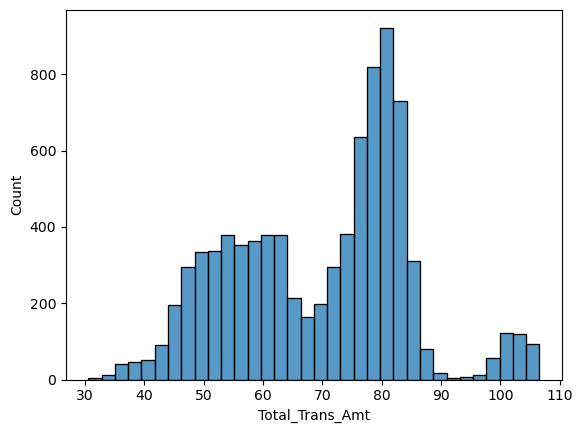

In [102]:
sns.histplot(df_new,x= 'Total_Trans_Amt')

<Axes: xlabel='Credit_Limit', ylabel='Count'>

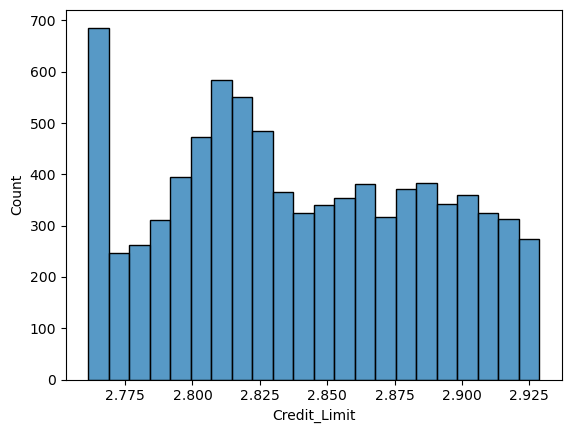

In [103]:
sns.histplot(df_new,x= 'Credit_Limit')

<Axes: xlabel='Customer_Age', ylabel='Count'>

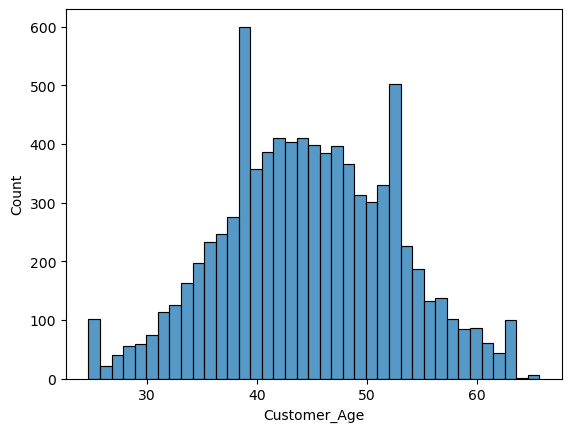

In [104]:
sns.histplot(df_new,x= 'Customer_Age')

In [105]:
df_new.describe()

,Total_Trans_Amt,Credit_Limit,Customer_Age
count,8441.000000,8441.000000,8441.000000
mean,69.766005,2.839785,44.632990
std,14.901709,0.047683,7.928189
min,30.612867,2.761394,24.643131
25%,57.196931,2.803096,39.329916
50%,73.688032,2.834227,44.217579
75%,80.553135,2.880859,50.078572
max,106.549237,2.928759,65.689052


In [106]:
inercia = []
ks = []

for k in range(1,30):
    modelo_iterado = KMeans(n_clusters = k, random_state = 5)
    modelo_iterado.fit(df_new)
    inercia.append(modelo_iterado.inertia_)
    ks.append(k)

c:\Users\Pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [107]:
#generamos un diccionario con los valores de las inercias y ks 
codo = {
    'inercia': inercia,
    'k':ks
}

#convertimos el diccionario a dataframe
codo = pd.DataFrame(codo)

<Axes: xlabel='k', ylabel='inercia'>

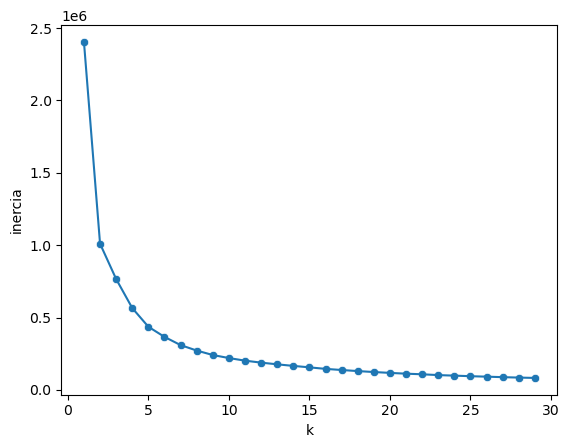

In [108]:
sns.scatterplot(data=codo,x='k',y='inercia',markers=True)
sns.lineplot(data=codo, x='k', y='inercia',)

In [113]:
modelo = KMeans(n_clusters=3,random_state = 10)
modelo.fit(df_new)

c:\Users\Pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=10)

In [114]:
data_noout['cluster'] = modelo.labels_
data_noout

,Total_Trans_Amt,Credit_Limit,Customer_Age,cluster
0,1144,12691.0,45,2
1,1291,8256.0,49,2
2,1887,3418.0,51,2
3,1171,3313.0,40,2
4,816,4716.0,40,2
...,...,...,...,...
10067,7590,4167.0,49,1
10089,7636,9611.0,52,1
10103,8531,22754.0,51,1
10119,6009,14657.0,55,1


In [115]:
data_noout.groupby(by='cluster').count()

,Total_Trans_Amt,Credit_Limit,Customer_Age
cluster,,,
0,1804,1804,1804
1,4704,4704,4704
2,1933,1933,1933


In [116]:
df_new.describe()

,Total_Trans_Amt,Credit_Limit,Customer_Age
count,8441.000000,8441.000000,8441.000000
mean,69.766005,2.839785,44.632990
std,14.901709,0.047683,7.928189
min,30.612867,2.761394,24.643131
25%,57.196931,2.803096,39.329916
50%,73.688032,2.834227,44.217579
75%,80.553135,2.880859,50.078572
max,106.549237,2.928759,65.689052


In [117]:
data_noout.describe()

,Total_Trans_Amt,Credit_Limit,Customer_Age,cluster
count,8441.000000,8441.000000,8441.000000,8441.000000
mean,3473.692927,5918.245480,46.429451,1.015283
std,1616.268012,5116.261508,8.112846,0.665236
min,510.000000,1438.300000,26.000000,0.000000
25%,2066.000000,2358.000000,41.000000,1.000000
50%,3684.000000,3624.000000,46.000000,1.000000
75%,4520.000000,7942.000000,52.000000,1.000000
max,8618.000000,23742.000000,68.000000,2.000000


In [118]:
data_noout.groupby(by='cluster').agg(['min','mean','max'])

Total_Trans_Amt                    Credit_Limit                        \
                    min         mean   max          min         mean      max   
cluster                                                                         
0                   695  2330.288248  4080       1438.3  5915.397118  23642.0   
1                  2950  4661.102891  8618       1438.3  5651.973618  23742.0   
2                   510  1651.202276  3150       1438.3  6568.882462  23700.0   

        Customer_Age                 
                 min       mean max  
cluster                              
0                 26  38.123614  52  
1                 26  47.092687  65  
2                 35  52.566994  68

# Caracteristicas de clusters
Los consumos totales y el limite de crédito parecen estar un poco mas amarrados como es de esperarse. Sin embargo hay una clara separación cerca de las 5k unidades de limite de crédito.
La edad no es un dato relevante para poder categorizar los datos del consumo.

<Axes: xlabel='Total_Trans_Amt', ylabel='Credit_Limit'>

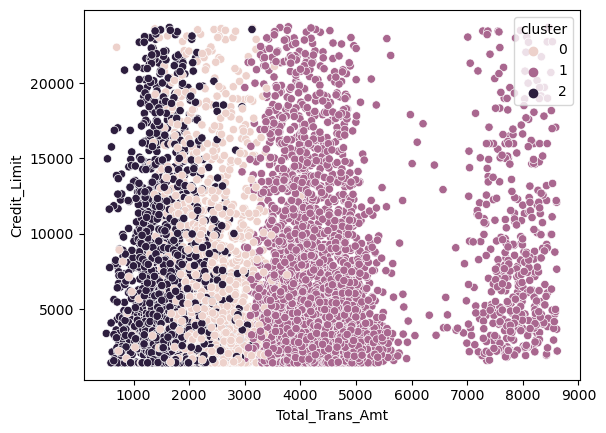

In [119]:
sns.scatterplot(data=data_noout,x='Total_Trans_Amt', y='Credit_Limit', hue='cluster')

<Axes: xlabel='Total_Trans_Amt', ylabel='Customer_Age'>

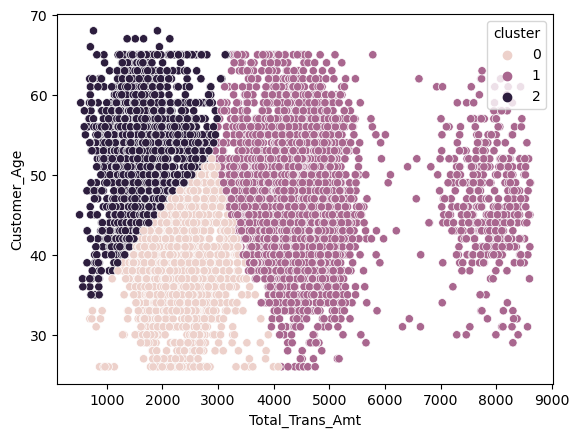

In [120]:
sns.scatterplot(data=data_noout,x='Total_Trans_Amt', y='Customer_Age', hue='cluster')

In [121]:
fig = px.scatter_3d(data_noout, x = 'Total_Trans_Amt',
y = 'Credit_Limit',
z = 'Customer_Age',
color = 'cluster')

fig.show()